# SVM

In this exercise, we see Support Vector Machine (SVM) with various kernel functions.  

We use Scikit-learn, a Python package of machine learning methods. We are using a toy binary classification example to understand Linear SVM, and then see feature expansion and kernel functions to extend it to non-linearly separable data.

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plots import plot, plot_expand, plot_simple_data
from helpers import get_circle_dataset, get_simple_dataset
%load_ext autoreload
%autoreload 2

# Aditional Libraries 

In [2]:
# Data manipulation and processing
import pandas as pd
import scipy.io

# Data visualization
import seaborn as sns

# Machine learning models and tools
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data preprocessing and transformation
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Image processing
from scipy.ndimage import rotate
from skimage.util import random_noise
from skimage.transform import resize

# 1 Scikit-Learn

Training an SVM classifer is not a easy task, so in this session, we are going to use Scikit-Learn, which is a machine learning library for Python. Most of the machine learning algorithms and tools are already implemented. In this exercise, we'll use this package to train and understand SVM. If you are interested in how to optimize a SVM, you can refer to [this](https://xavierbourretsicotte.github.io/SVM_implementation.html).

This package `sklearn` should already be implemented in your conda enviornment. If it's not the case, type the following command in your terminal:
```
conda install -y -c conda-forge sklearn
```

Scikit-Learn has modules implemented broadly for 
- Data Transformations: https://scikit-learn.org/stable/data_transforms.html
- Model Selection and Training: https://scikit-learn.org/stable/model_selection.html
- Supervised Techniques: https://scikit-learn.org/stable/supervised_learning.html
- Unsupervised Techniques: https://scikit-learn.org/stable/unsupervised_learning.html

All the magic happens under the hood, but gives you freedom to try out more complicated stuff.  
Different methods to be noted here are
- `fit`: Train a model with the data
- `predict`: Use the model to predict on test data
- `score`: Return mean accuracy on the given test data

Have a look at [this](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#learning-and-predicting) for a simple example.

We will explore SVM for classification in this session: [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC). We will start here with the linear kernel.

In [3]:
# We import the SVM classifier class from scikit-learn.
from sklearn.svm import SVC

# 2 Linear SVM

SVM tries to solve linear classification problem of this form:

$$
\begin{align}
    \mathbf{w}^* = \underset{\mathbf{w},\{\xi_n\}}{\operatorname{argmin}}  \ \ & \frac{1}{2}\|\mathbf{w}\|^2 + C \sum^N_{n=1}\xi_n \\
    \operatorname{subject \  to} \ \ &  t_n\cdot(\tilde{\mathbf{w}}\cdot\mathbf{x_n}) \geq 1-\xi_n , \forall n \\
                        &\text{and  }\  \xi_n \geq 0 , \forall n
\end{align}
$$
where, $\tilde{\mathbf{w}}$ are the weights with bias term, $x_n$ is a data sample and $t_n$ is a label.

**Q.** Why do we minimize $\|\mathbf{w}\|$ ? 

**A.** 

**Q.** What is C? How should we choose the best value for C?

**A.** 
    
**Q.** What does it mean when $\xi_i \gt 0$ ?

**A.** 


## 2.1 Binary Classification

Let's begin with a simple **binary** classification using Linear SVM.
The data is simply **linearly** separable.

We visualize here the optimal maximum-margin solution without misclassifications.

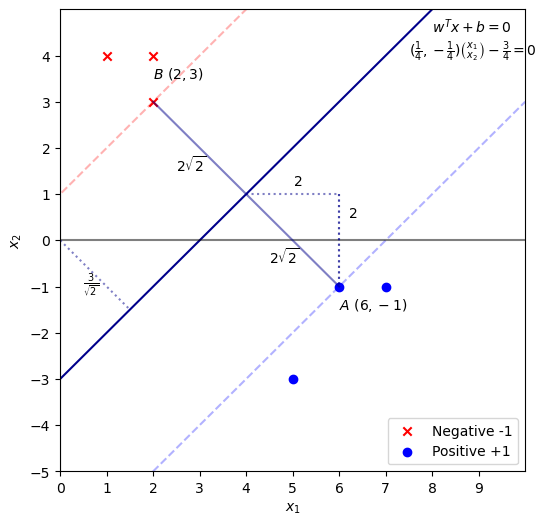

In [4]:
# Simple data with 3 points per class
X = np.array([[2,4],[1,4],[2,3],[6,-1],[7,-1],[5,-3]] )
Y = np.array([-1, -1, -1, 1, 1, 1])
plot_simple_data()

In this part, you are asked to build a SVM classifier using SVC and to understand the outputs from the fitted model.

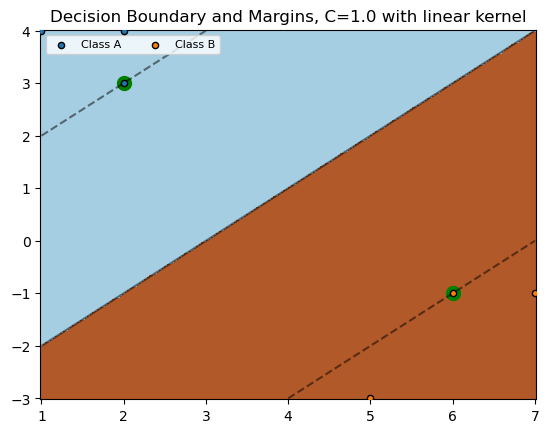

w =  [[ 0.25 -0.25]]
w0 =  [-0.75]
Number of support vectors for each class =  [1 1]
Support vectors =  [[ 2.  3.]
 [ 6. -1.]]
Indices of support vectors =  [2 3]


In [5]:
### WRITE YOUR CODE HERE
# 1. Declare a SVC with C=1.0 and kernel='linear'
clf = SVC(C=1.0, kernel='linear')

# 2. Use X and Y to fit the model
clf.fit(X, Y)

# 3. Plot the fitted model
plot(X, Y, clf)

# Some information we can extract from the model
# Take note of them as you might need them in the future!
print('w = ', clf.coef_)
print('w0 = ', clf.intercept_)
print('Number of support vectors for each class = ', clf.n_support_)
print('Support vectors = ', clf.support_vectors_)
print('Indices of support vectors = ', clf.support_)

In this case, we found that we have 2 **support vectors**, one in each class. They are shown highlighed in green in the plot. A support vector is a data sample that is either on the margin or within the margin (or misclassified). 

Let's inspect the result of the classification. We do the classification in the following way:

$$ 
y_i = \begin{cases}
-1 & \text{if} \ \mathbf{x}_i^T \mathbf{w} + w_0 < 0\\
1 & \text{otherwise}
\end{cases}
$$

*Note*: when doing this on multiple data points at a time, $X$ is an $N\times D$ matrix.

In [6]:
# Use the weights (w) from the fitted model to predict the labels of input data points
def raw_predict(X, w, w0):
    '''
    Given input data X, SVM weight w and w0, output the prediction result.
    
    Args:
        X: data, array of shape (N, D) where N is the number of datapoints and D is the dimension of features.
        w: weights, array of shape (D,)
        w0: bias, array of shape (1,)
    Returns:
        out: predictions, array of shape (N,)
    '''
    ### WRITE YOUR CODE HERE
    out = np.dot(X, w) + w0
    return np.where(out < 0, -1, 1)

x_test = np.array([
    [4, 2],
    [6, -3]
])

### WRITE YOUR CODE HERE: Use your implementation to do the prediction on the test data.
raw_pred = raw_predict(x_test, clf.coef_.flatten(), clf.intercept_)

print("Prediction from your implementation: ", raw_pred)

### WRITE YOUR CODE HERE: Use scikit-learn's predict function to do the prediction on the test data.
model_predict = clf.predict(x_test)

print("Prediction from the model: ", model_predict)

assert np.isclose(raw_pred, model_predict).all(), "Your implementation is not correct."


Prediction from your implementation:  [-1  1]
Prediction from the model:  [-1  1]


Now, let us determine the indices of the support vectors. (Reminder: These are the data samples that fall on the margin or within the margin). 

In [7]:
## We can also calculate the decision function manually.

## Step 1
### WRITE YOUR CODE HERE: Code the decision function: Xw + w_0
decision_function = np.dot(X, clf.coef_.flatten()) + clf.intercept_

## Step 2: We can also retrieve the decision function from the model:
decision_function_from_model = clf.decision_function(X)

assert np.isclose(decision_function, decision_function_from_model).all(), "Your implementation is not correct."

# Get the indices of support vectors directly from the model
support_vector_indices = clf.support_

print('Indices of support vectors from the model = ', support_vector_indices)

# Ensure both arrays have the same elements for the comparison
assert np.array_equal(support_vector_indices, clf.support_), "Your implementation is not correct."


Indices of support vectors from the model =  [2 3]


## 2.2 Different C values

Let's explore the effect of $C$ on a different dataset.

**Q.** How do you expect the margin to vary with C? *Hint*: have a look at the optimization formulation above.

**A.** 

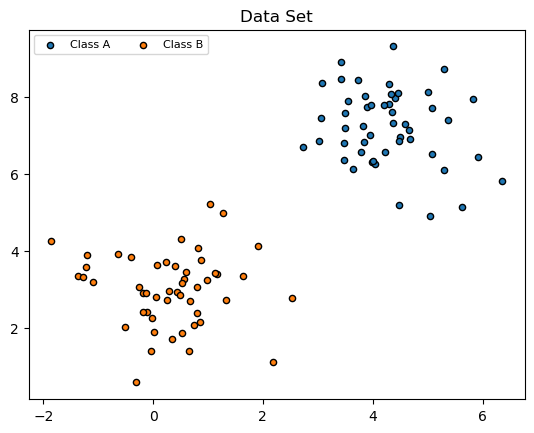

In [8]:
# Get the simple dataset
X, Y = get_simple_dataset()
plot(X, Y, None, dataOnly=True)

In the code below, vary the C value from 0.001 to 10 and pay attention to the changes.

The plot shows the decision boundary and margins of the learnt model. Encircled points are the support vectors.  
WARNING: if the margins go beyond the limits of the axis, they might not be shown.

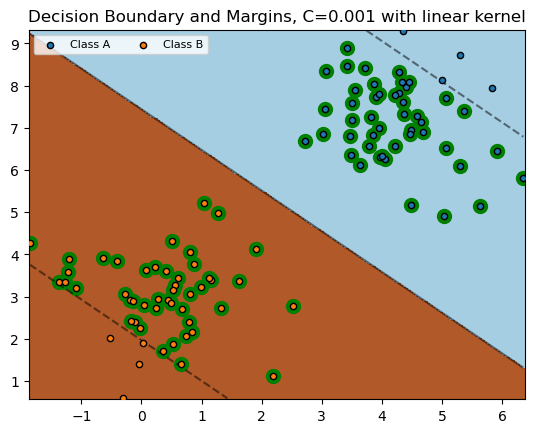

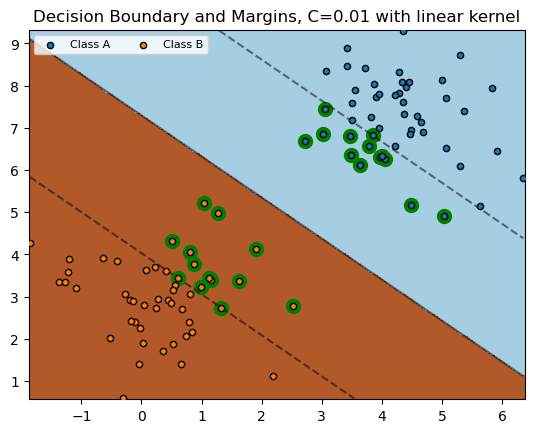

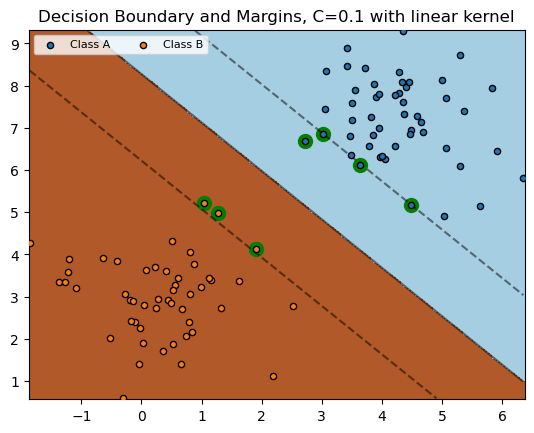

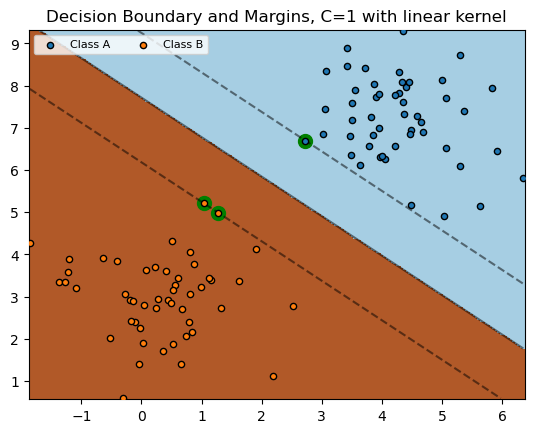

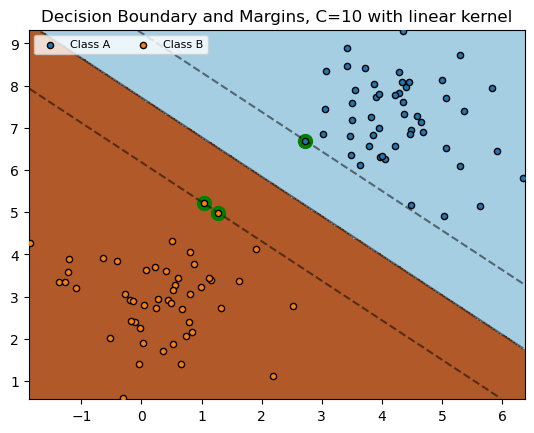

In [9]:
# Declare a SVM model with linear kernel and PLAY WITH THE VALUE OF C
for C_value in [0.001, 0.01, 0.1, 1, 10]:
    clf = SVC(C=C_value, kernel='linear')
    
    # Call the fit method
    clf.fit(X, Y)
    
    # Plot the decision boundary
    plot(X, Y, clf)


### Additional Reading (if interested)
- Multiclass SVM (Bishop- Multiclass SVMs 7.1.3)
- Can we have probabilistic interpretation of SVM? (Bishop- Relevance Support Machine 7.2)

# 3 Kernel SVM

Beyond the linear problem we discussed before, SVM can also solve non-linear classification problem by doing some feature expansion on the input data. 

We replace $\mathbf{x}_i$ with $\phi(\mathbf{x}_i)$, and then $\mathbf{x}_i^\top\mathbf{x}_j$ with $\phi(\mathbf{x}_i)^\top\phi(\mathbf{x}_j)=k(\mathbf{x}_i,\mathbf{x}_j)$. 

$\phi(\cdot)$ is the (possibly unknown) feature expansion function, and $k(\cdot)$ is the kernel function.

The **dual form** of this problem is given by:

$$
\begin{align}
    \underset{\{\lambda_i\}}{\operatorname{max}} \ \ 
    & \sum_{n=1}^N \lambda_i - \frac 1 2 \sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jt_it_jk(\mathbf{x}_i,\mathbf{x}_j)  \\   
    \operatorname{subject \ to} & \ \ \sum_{i=1}^N \lambda_it_i = 0 \\
                 & \ \ 0 \leq \lambda_i \leq C, \forall i \ \ 
\end{align}
$$

**Q.** 
1. How can you write $\mathbf{w}$ using $\lambda_i$ and function $\phi$?
2. How is $y(\mathbf{x})$ represented using $\lambda_i$?
 
**A.**
1. To express $\mathbf{w}$ using $\lambda_i$ and the feature expansion function $\phi$, we can write it as follows:

$$
\mathbf{w} = \sum_{i=1}^N \lambda_i t_i \phi(\mathbf{x}_i)
$$

2. The expression for $y(\mathbf{x})$ in terms of the Lagrange multipliers $\lambda_i$ is given by:

$$
y(\mathbf{x}) = \sum_{i=1}^N \lambda_i t_i k(\mathbf{x}_i, \mathbf{x}) + b
$$

Here, $k(\mathbf{x}_i, \mathbf{x})$ represents the kernel function, and $b$ is the bias term.


We continue with the Scikit-Learn implementation of [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The main parameters you should look for are:
- Kernel Functions: `kernel`. Linear, Polynomial and RBF ($X$ is the data)
    - Linear: `linear`. $\langle X, X' \rangle $.
    - Polynomial: `poly`. $( \gamma \langle X, X' \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`.
    - RBF: `rbf`. $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, must be greater than 0.
- Penalty term, `C`: for all
- `gamma`: for Polynomial and RBF kernel (mostly RBF)
- `degree`: for Polynomial kernel


## 3.1 Non-linearly separable data

We use a binary dataset that cannot be separated linearly in the original feature space.

Then, we'll try the different kernel and explore how their parameters affect the results.

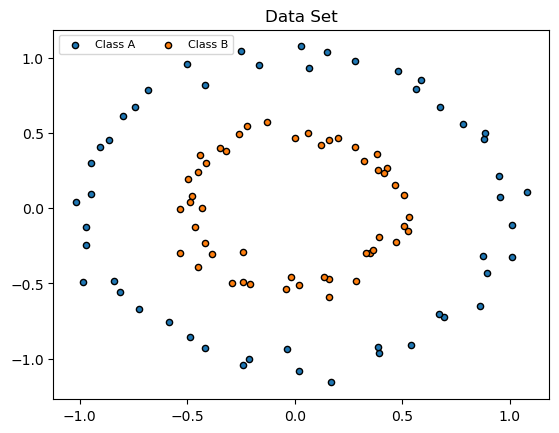

In [10]:
# Load data
X, Y = get_circle_dataset()
plot(X, Y, None, dataOnly=True)

## 3.2 Linear SVM

As you should expect, linear SVM does not perform well in this case.

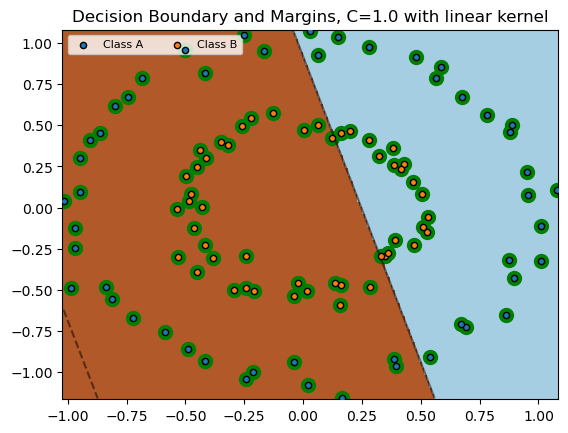

In [11]:
# Use SVM with linear kernel
clf_linear = SVC(kernel='linear', C=1.0)
    
clf_linear.fit(X, Y)
plot(X, Y, clf_linear)

## 3.3 Polynomial SVM

For polynomial SVM, we have two options:
1. We can explicitely write a polynomial feature expansion $\phi_\text{poly}(\cdot)$ to edit the data $X$, then use linear SVM on it.
2. We use the kernel trick to only define a kernel function $k_\text{poly}(\cdot,\cdot)$, which is directly used in SVM.

Let's do both and compare the results!

Fill in the function `expand_X()` that performs polynomial feature expansion. 
You should add a bias term, but **omit the interaction terms**. An example:

For $D=2$ and $\text{degree}=3$, the data
$$
\mathbf{x}_i = \begin{bmatrix}\mathbf{x}_i^{(0)}& \mathbf{x}_i^{(1)}\end{bmatrix},
$$
after the polynomial feature expansion, will become
$$ 
\mathbf{\phi}(\mathbf{x}_i) = \begin{bmatrix}\mathbf{1} & \mathbf{x}_i^{(0)} & \mathbf{x}_i^{(1)} & (\mathbf{x}_i^{(0)})^2 & (\mathbf{x}_i^{(1)})^2 & (\mathbf{x}_i^{(0)})^3 & (\mathbf{x}_i^{(1)})^3 \end{bmatrix}.
$$

In [12]:
# Perform degree-d polynomial feature expansion of input data X
def expand_X(X, degree):
    """
    Polynomial feature expansion with bias but omitting interaction terms
    
    Args:
        X (array): data, shape (N, D).
        degree (int): The degree of the polynomial feature expansion.
    Returns:
        expanded_X (array): Expanded data with shape (N, new_D), 
                               where new_D = D * degree + 1
    """
    # Ensure the input data has the correct shape
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    
    # Get the number of data points and original feature dimensionality
    N, D = X.shape
    
    # Initialize the expanded data with bias term
    expanded_X = np.ones((N, 1))
    
    # Perform polynomial feature expansion without interaction terms
    for d in range(1, degree + 1):
        expanded_X = np.concatenate([expanded_X, X ** d], axis=1)
    
    return expanded_X


The original data has 2 features.
After degree-2 polynomial feature expansion (with bias, without interaction terms), the data has 5 features.


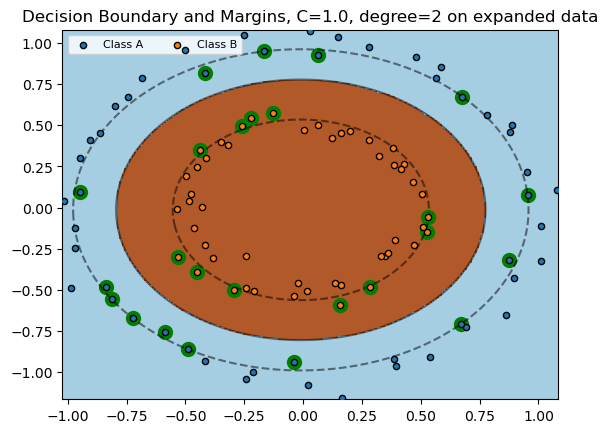

In [13]:
# Polynomial SVM
degree = 2  # You can play with the degree. How does the decision boundary change?

## Do polynomial feature expansion
expanded_X = expand_X(X, degree)

print("The original data has {} features.".format(X.shape[1]))
print("After degree-{} polynomial feature expansion (with bias, without interaction terms), the data has {} features.".format(degree, expanded_X.shape[1]))

## Use SVM with linear kernel on expanded data
### WRITE YOUR CODE HERE: You can play with C
C_value = 1.0  # You can adjust the value of C
expanded_clf = SVC(kernel='linear', C=C_value)
expanded_clf.fit(expanded_X, Y)

plot_expand(X, Y, expanded_clf, degree=degree)


The non-linearly separable dataset can now be classified correctly by a linear SVM, thanks to the polynomial feature expansion.

Let's now directly use the polynomial kernel function in SVM.

Given data $\mathbf{X}$ with $N$ samples, its kernel matrix $\mathbf{K}$ is the $N \times N$ symmetric Gram matrix with elelments 

$$ \mathbf{K}_{n,m} = \phi(\mathbf{x}_n)^T\phi(\mathbf{x}_m) = k(\mathbf{x}_n, \mathbf{x}_m) $$

The polynomial kernel is SVM is written as:
- poly: $( \gamma \langle \mathbf{X}, \mathbf{X'} \rangle + r)^d $. $d$ is specified by keyword `degree`, $r$ by `coef0`,
   
where $X$ is the data.

Note that $\phi$ **does not appear explicitly** in the kernel functions!

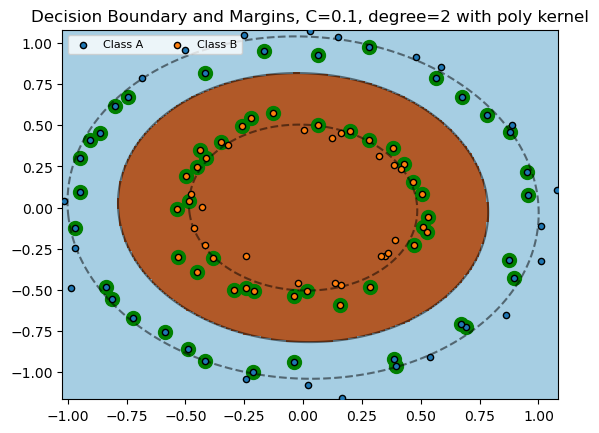

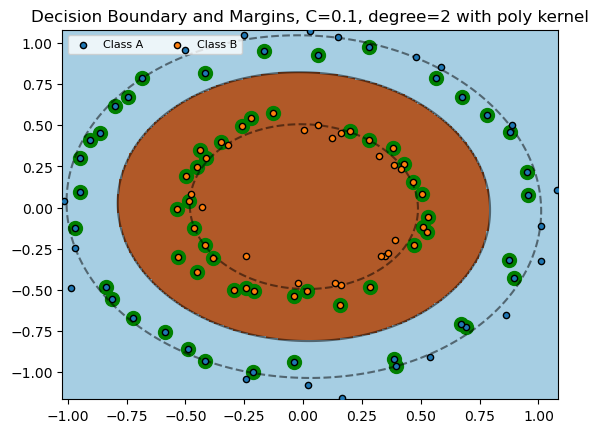

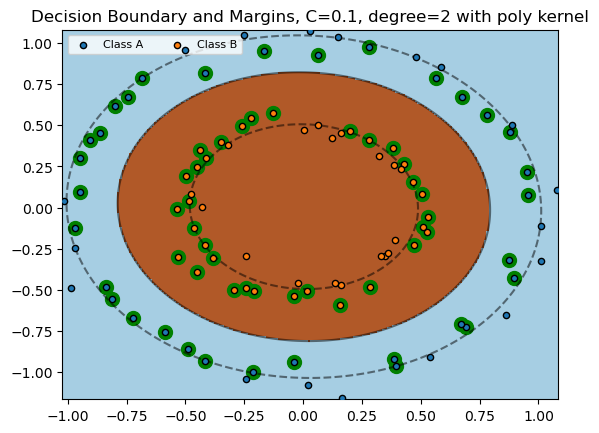

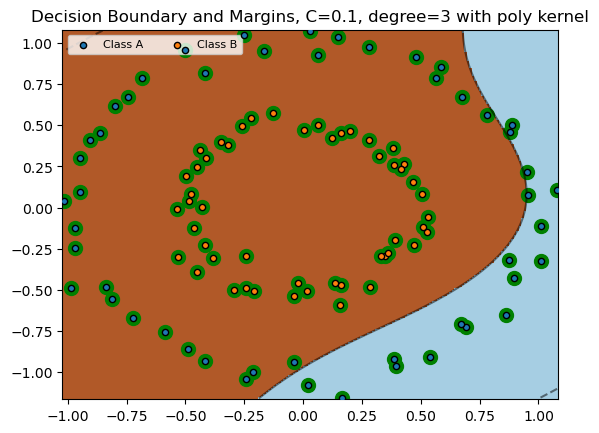

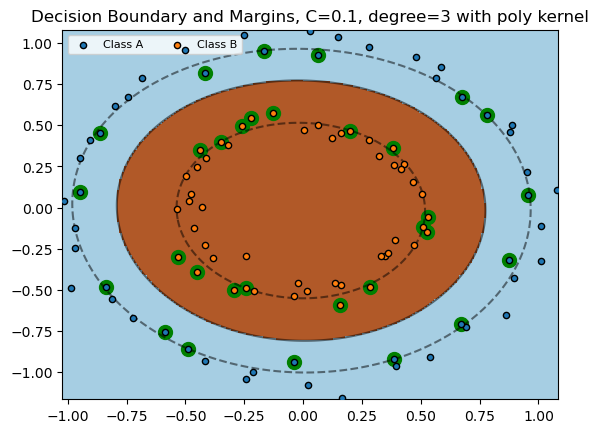

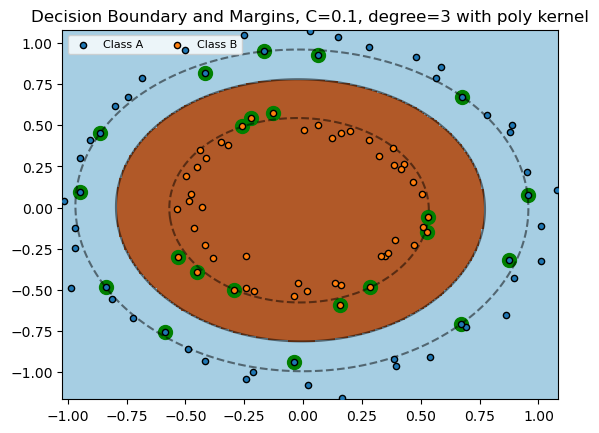

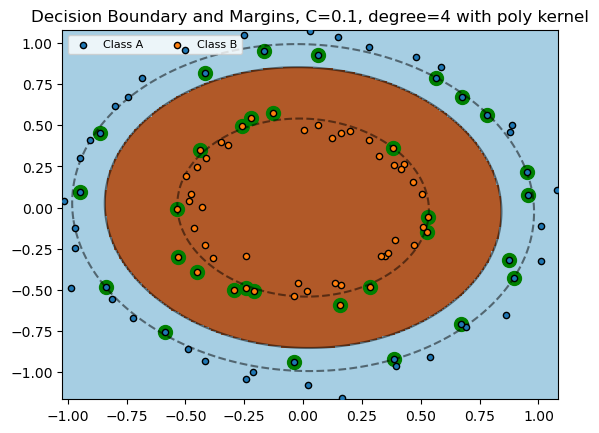

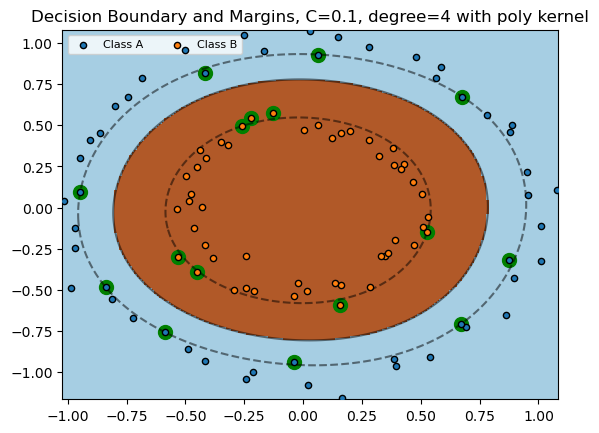

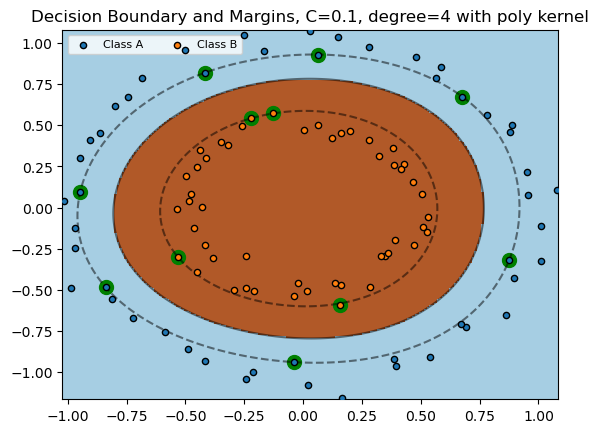

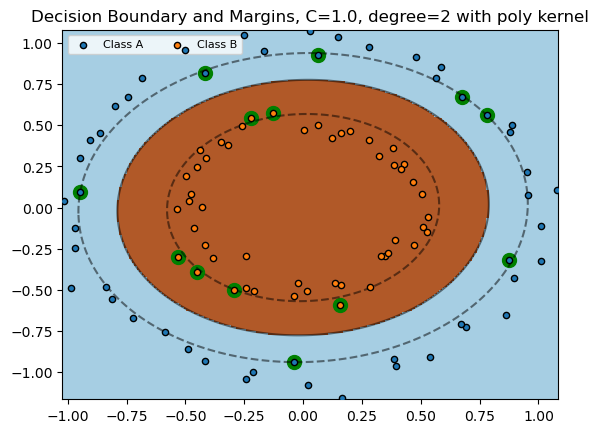

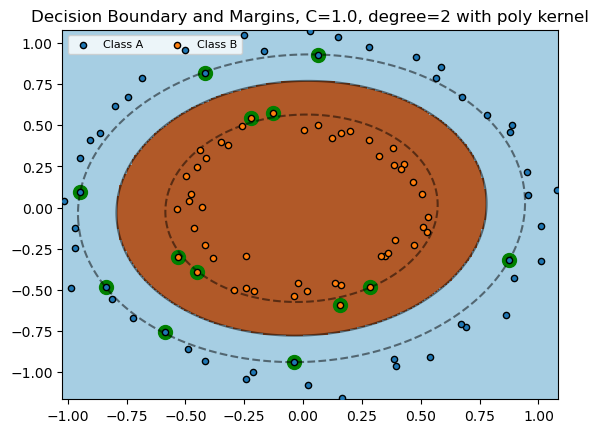

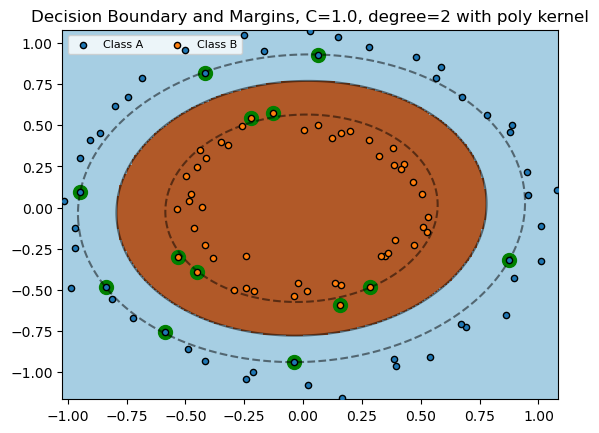

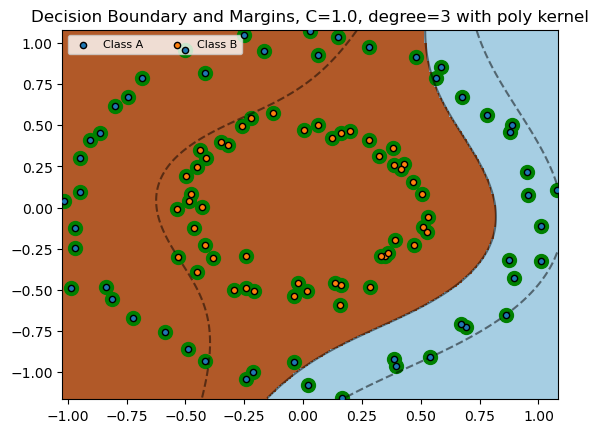

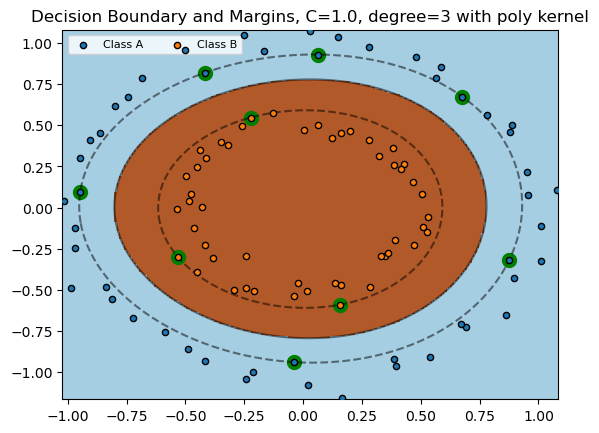

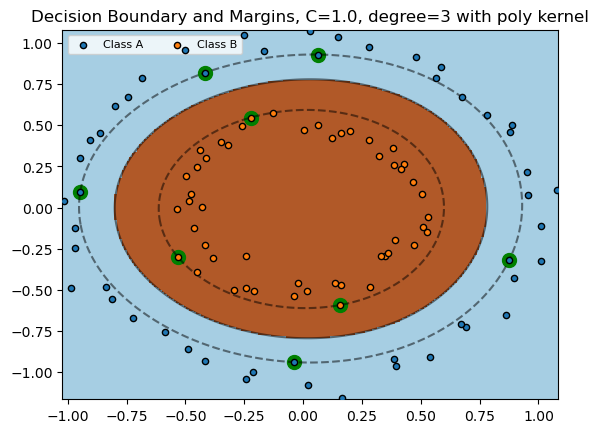

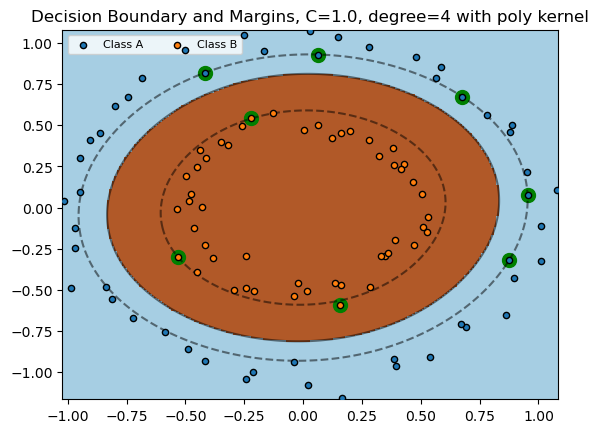

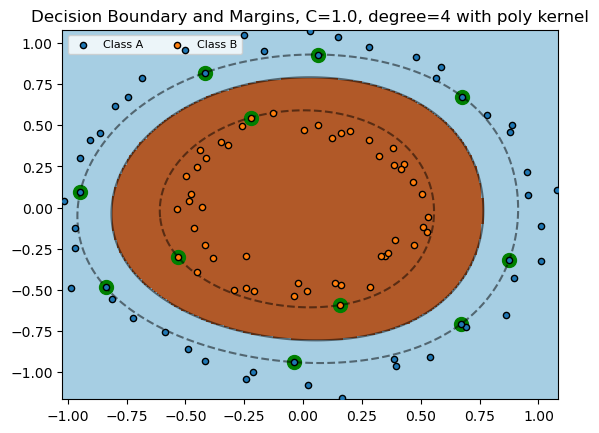

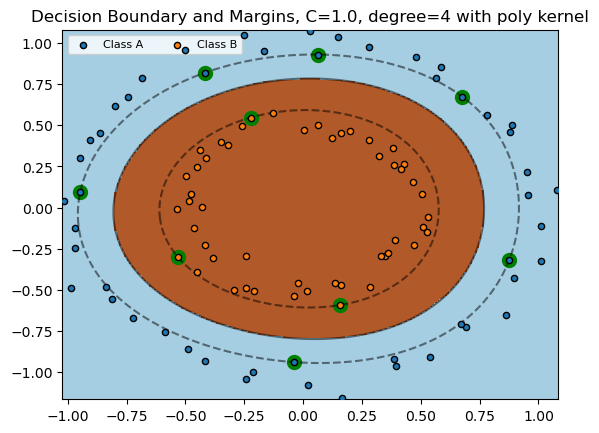

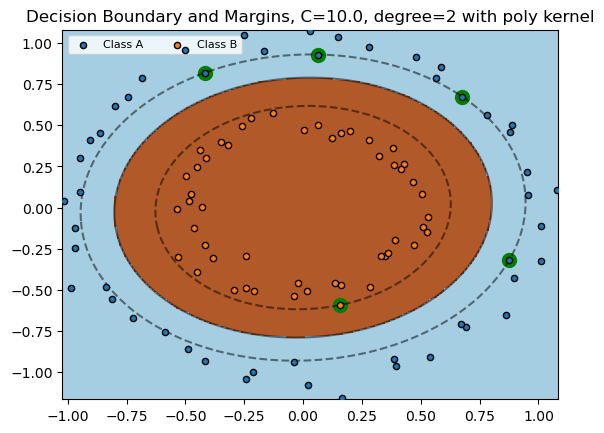

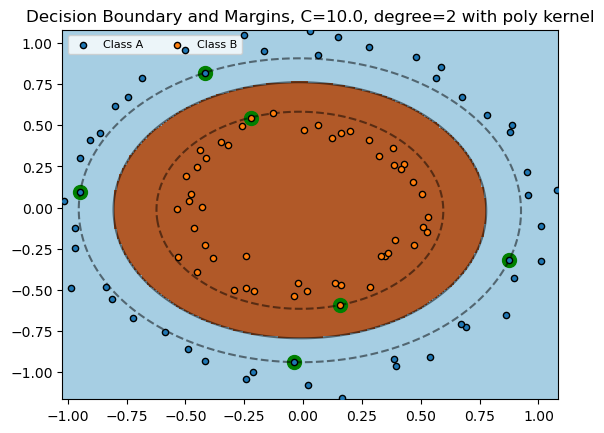

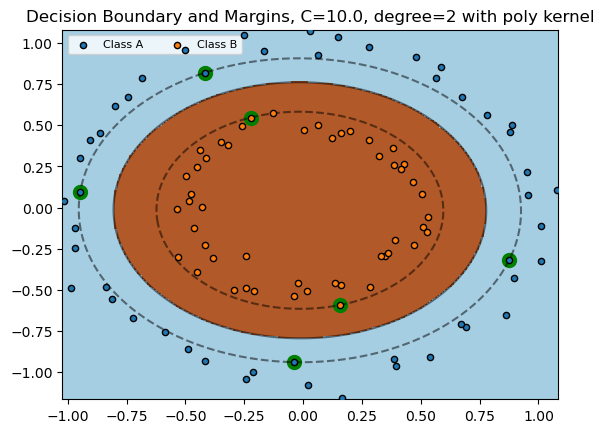

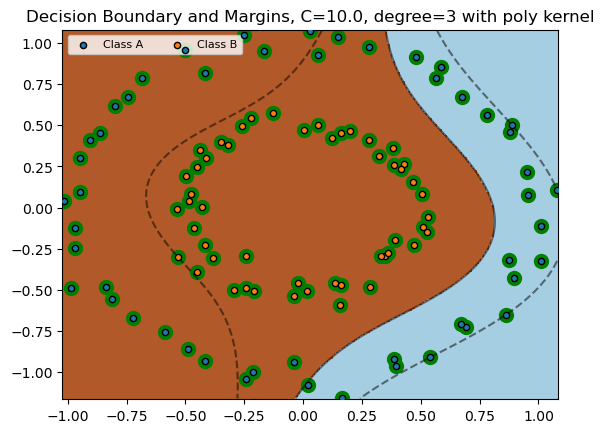

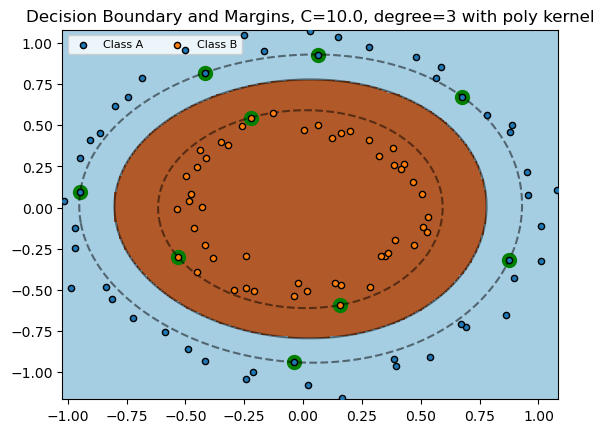

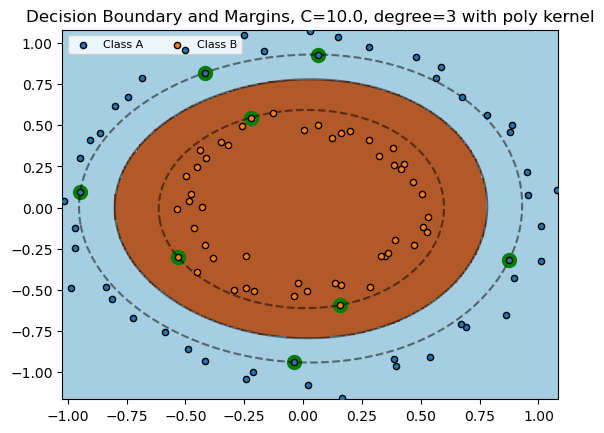

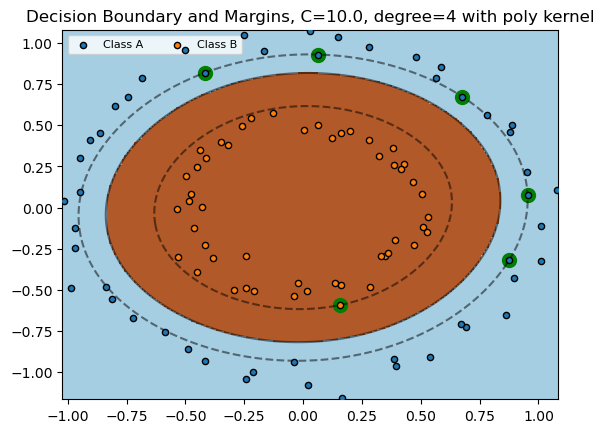

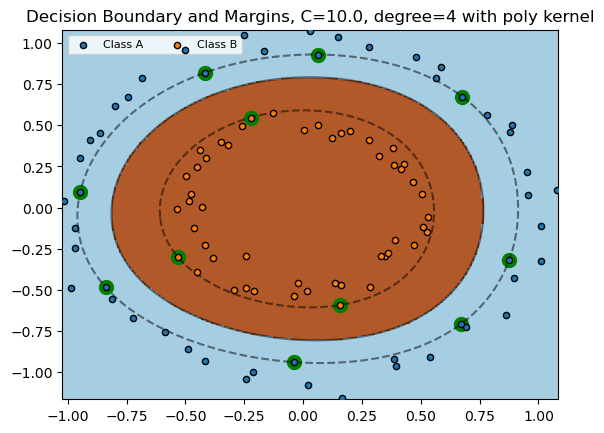

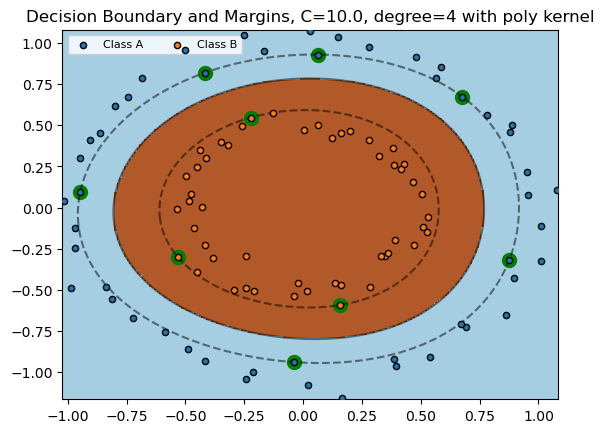

In [14]:
# Hyperparameter lists
C_values = [0.1, 1.0, 10.0]  # values for C
degree_values = [2, 3, 4]  # values for the degree of the polynomial
coef0_values = [0.0, 1.0, 2.0]  # values for the coef0 parameter

# Loop through combinations of hyperparameters
for C_value in C_values:
    for degree_value in degree_values:
        for coef0_value in coef0_values:
            # Use SVM with poly kernel
            clf_poly = SVC(kernel='poly', C=C_value, degree=degree_value, coef0=coef0_value)
    
            clf_poly.fit(X, Y)
            plot(X, Y, clf_poly)

plt.show()


**Q.** 
1. What are the differences between polynomial feature expansion and polynomial kernel function? 

2. Is the SVM trained with linear kernel on polynomially expanded data same as the SVM trained with polynomial kernel function on original data?

**A.** 
1. 
   - *Polynomial Feature Expansion:*
     - **Objective:** To transform the original input features into a higher-dimensional space by explicitly computing polynomial combinations of the features.
     - **Process:** Involves creating new features based on powers and combinations of the original features up to a specified degree.
     - **Result:** The expanded feature space allows linear algorithms (like linear SVM) to capture non-linear patterns.

   - *Polynomial Kernel Function:*
     - **Objective:** To implicitly compute the dot product in a higher-dimensional space without explicitly expanding the features.
     - **Process:** Computes the similarity (dot product) between data points in the original space as if they were expanded into a higher-dimensional space.
     - **Result:** Allows linear algorithms to operate in a higher-dimensional space without explicitly calculating the expanded features.

2.
   - No, they are not the same.
   - SVM trained with a linear kernel on polynomially expanded data explicitly transforms the input features into a higher-dimensional space using polynomial feature expansion before applying a linear SVM. This involves creating new features based on polynomial combinations of the original features.
   - SVM trained with a polynomial kernel function on original data implicitly computes the dot product in a higher-dimensional space without explicitly expanding the features. It directly operates in the higher-dimensional space defined by the polynomial kernel without the need for explicit feature expansion.
   - While both approaches aim to capture non-linear patterns, they achieve it through different mechanisms. The choice between them depends on the characteristics of the data and the computational efficiency desired.


## 3.4 RBF SVM

Finally, let's try the Radial Basis Function (RBF) kernel:
* `rbf`: $\exp(-\gamma ||X - X'||^2)$. $\gamma$ is specified by keyword `gamma`, and must be greater than 0.

$\gamma$ is a form of scaling factor for the distance between points. If it is increased, then the exponential decays faster with distance, and vice-versa. 

Try different values of $\gamma$ below, e.g., in the range $[0.01, 100]$, and see how the decision function is affected.

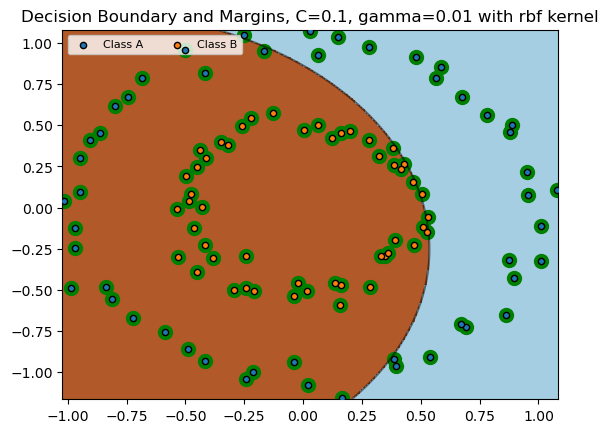

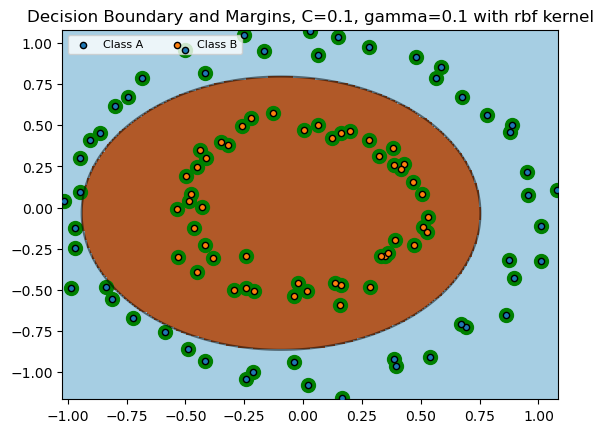

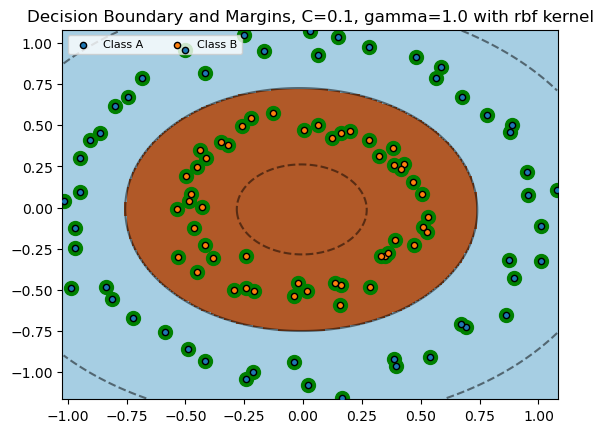

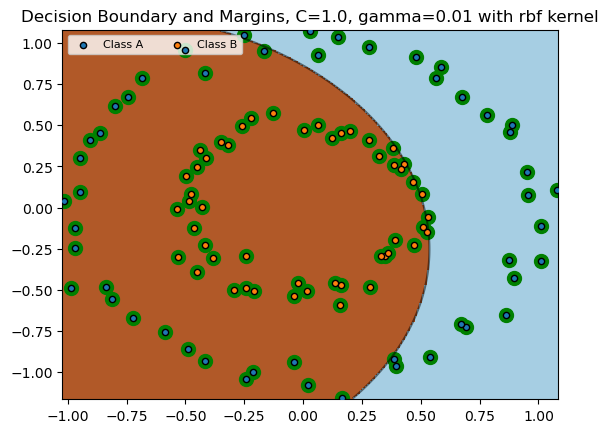

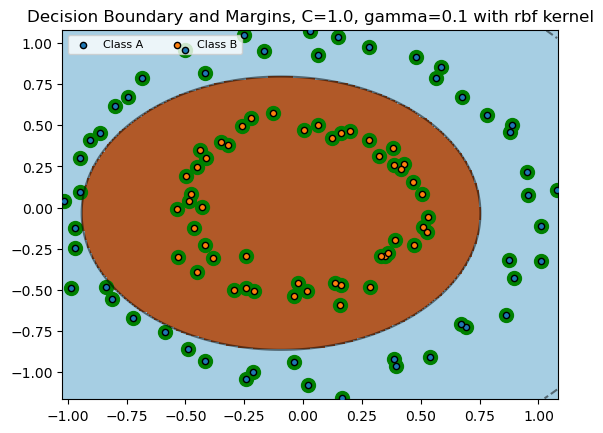

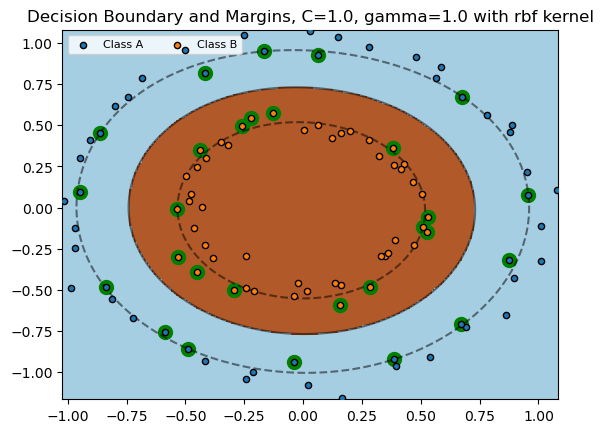

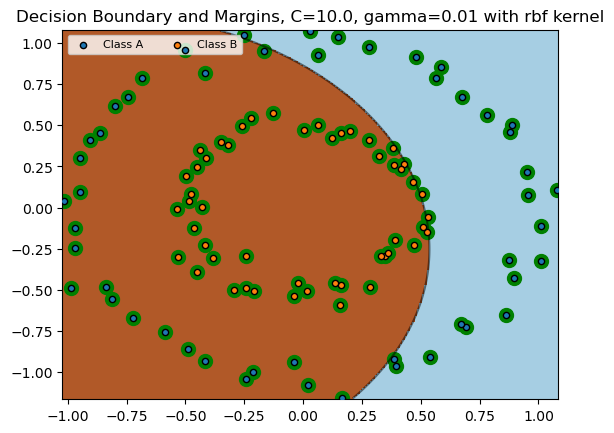

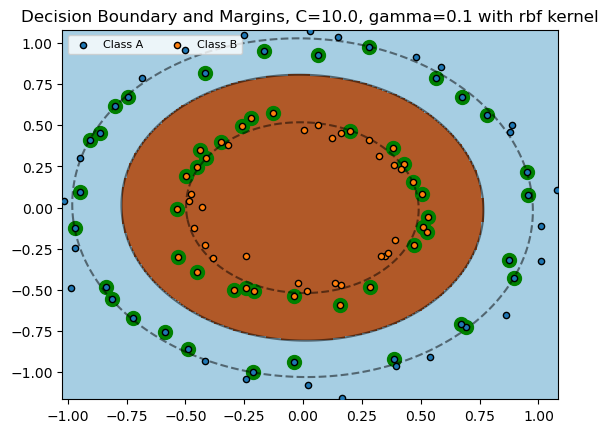

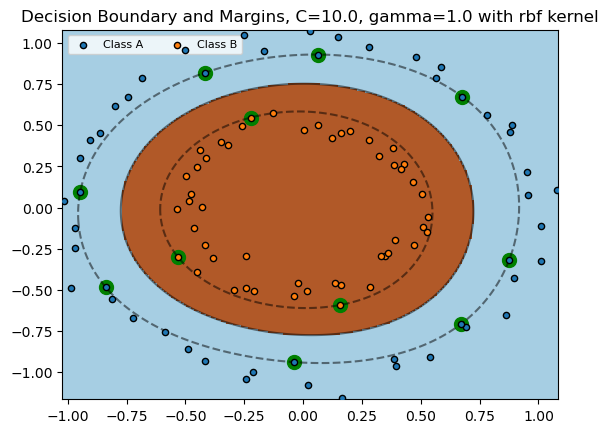

In [15]:
# Hyperparameter lists
C_values_rbf = [0.1, 1.0, 10.0]  #  values for C
gamma_values_rbf = [0.01, 0.1, 1.0]  #  values for gamma

# Loop through combinations of hyperparameters
for C_value_rbf in C_values_rbf:
    for gamma_value_rbf in gamma_values_rbf:
        # Use SVM with rbf kernel
        clf_rbf = SVC(kernel='rbf', C=C_value_rbf, gamma=gamma_value_rbf)
    
        clf_rbf.fit(X, Y)
        plot(X, Y, clf_rbf)



### Choosing a kernel

We have seen how to use SVM for classification as a linear classifier, and then how to extend it to non-linearly separable data through the use of kernel functions.

But in practice, **how does one choose which kernel to use and its hyperparameters?**

You guessed it $\rightarrow$ by using a validation set! 

While in this exercise we have only tested SVM on the training data to visualize the effect of the different hyperparameters and kernels, on real problems we would also use validation data to evaluate the performance of the classifier.

# 10 Class SVM Classifiying Persian Numbers

**Load Dataset**

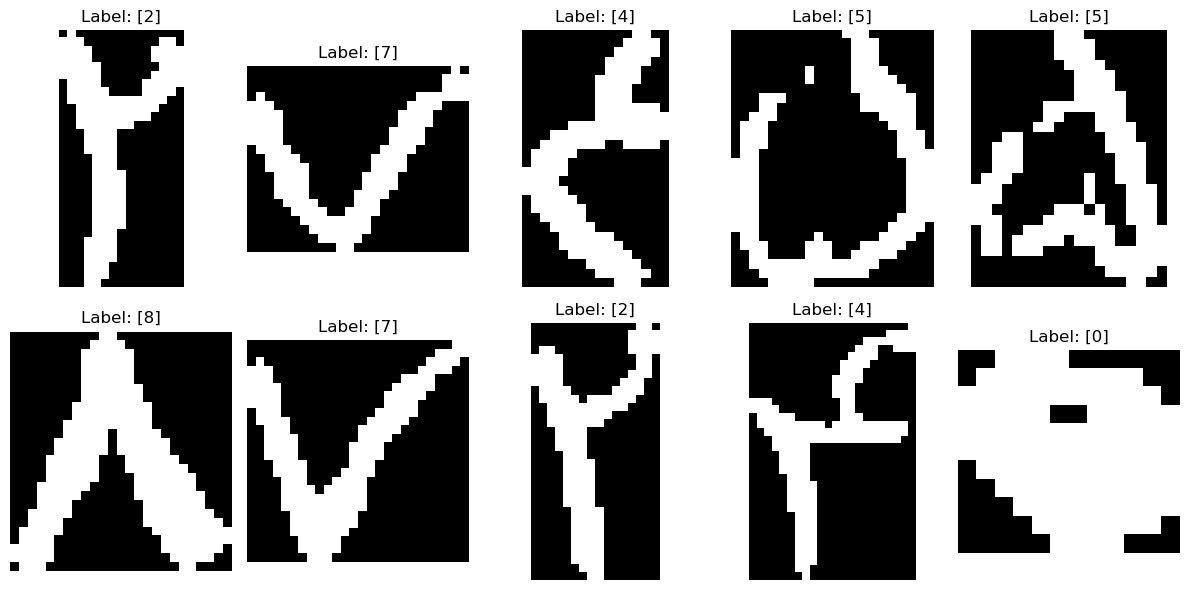

In [16]:

# Load the .mat file
mat_data = scipy.io.loadmat('Data-hoda-full.mat')

# Access the data from the dictionary
X = mat_data['Data'][:4000]
Y = mat_data['labels'][:4000]

# Set seed for reproducibility
np.random.seed(42)

# Randomly choose 10 indices
random_indices = np.random.choice(len(X), 10, replace=False)

# Plot 10 random Persian number images in multiple subplots
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    # Extract the image array from the object structure
    image_array = X[index][0]
    plt.imshow(image_array, cmap='gray')
    plt.title(f"Label: {Y[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**Standardize image size**

In [17]:
def standardize_image_size(images, max_height, max_width):
    standardized_images = []
    
    for i in range(images.shape[0]):
        img = images[i, 0]

        if len(img.shape) == 1:
            h, w = 1, img.shape[0]
        else:
            h, w = img.shape[:2]

        # Determine padding
        pad_top = (max_height - h) // 2
        pad_bottom = max_height - h - pad_top
        pad_left = (max_width - w) // 2
        pad_right = max_width - w - pad_left

        # Adaptive padding and resize
        padded_img = np.pad(img, ((pad_top, pad_bottom), (pad_left, pad_right)), constant_values=0)
        resized_img = resize(padded_img, (max_height, max_width), anti_aliasing=True)
        
        standardized_images.append(resized_img)
    
    return np.array(standardized_images)


def find_max_dimensions(array):
    """
    Find the maximum height and width 

    Parameters:
    - array of obejcts: 

    Returns:
    - h_max: int, the maximum height.
    - l_max: int, the maximum width.
    """
    h_max = 0
    l_max = 0

    for i in range(array.shape[0]):
        current_array = array[i, 0]  
        h_max = max(h_max, current_array.shape[0])
        l_max = max(l_max, current_array.shape[1])

    return h_max, l_max

max_height, max_width = find_max_dimensions(X)
print("Maximum Height:", max_height)
print("Maximum Width:", max_width)


Maximum Height: 54
Maximum Width: 45


### Why We Can't Use Simple Reshape on Object Arrays:

The dataset consists of objects where each object is a matrix representing a Persian number image. These matrices have varying dimensions, and they are not consistent across samples. Applying simple reshape functions directly on objects is challenging because:

1. **Variable Dimensions:** Each image has a different height and width, making it difficult to reshape them uniformly without distorting the content.

2. **Object Type:** The elements in the object arrays are themselves NumPy arrays, making direct reshaping complex due to the nested structure.

### Algorithm to Standardize Image Sizes:

To address the varying dimensions and object structure, we implemented the following algorithm:

1. **Find Maximum Dimensions:** We determined the maximum height and width among all samples to identify the largest image dimensions.

2. **Adaptive Padding and Resize:** For each image, we applied adaptive padding to create a border around the image, ensuring it fits the maximum dimensions. We then resized the padded image to the target size.

3. **Centering within Padding:** To maintain the image's center within the padded area, we calculated the padding required on all sides (top, bottom, left, and right) based on the difference between the maximum dimensions and the image's actual dimensions.

4. **Visualization:** Random samples from the standardized dataset were visualized to showcase the uniformity achieved in terms of image size.

This algorithm ensures that all images have the same dimensions, allowing for consistent processing and analysis, particularly in the context of machine learning models where input dimensions need to be uniform.


The dataset consists of objects where each object is a matrix representing a Persian number image. These matrices have varying dimensions, and they are not consistent across samples. Applying simple reshape functions directly on objects is challenging because:

1. **Variable Dimensions:** Each image has a different height and width, making it difficult to reshape them uniformly without distorting the content.

2. **Object Type:** The elements in the object arrays are themselves NumPy arrays, making direct reshaping complex due to the nested structure.

### Impleamneted Algorithm to Standardize Image Sizes:

To address the varying dimensions and object structure, we implemented the following algorithm:

1. **Find Maximum Dimensions:** We determined the maximum height and width among all samples to identify the largest image dimensions.

2. **Adaptive Padding and Resize:** For each image, we applied adaptive padding to create a border around the image, ensuring it fits the maximum dimensions. We then resized the padded image to the target size.

3. **Centering within Padding:** To maintain the image's center within the padded area, we calculated the padding required on all sides (top, bottom, left, and right) based on the difference between the maximum dimensions and the image's actual dimensions.

4. **Visualization:** Random samples from the standardized dataset were visualized to showcase the uniformity achieved in terms of image size.

This algorithm ensures that all images have the same dimensions, allowing for consistent processing and analysis, particularly in the context of machine learning models where input dimensions need to be uniform.


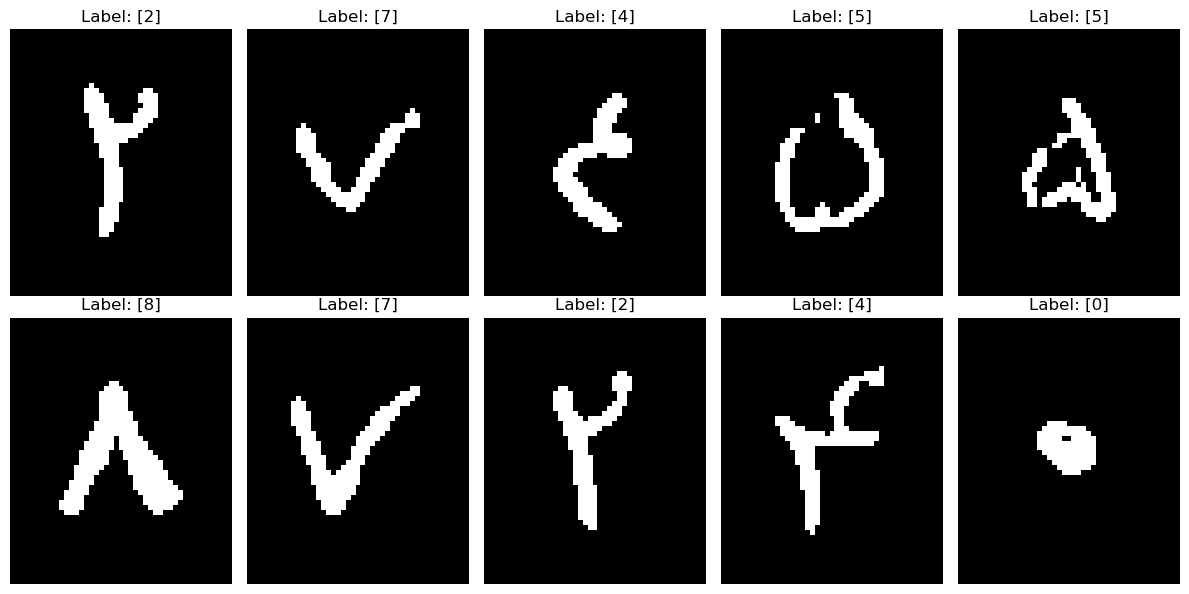

In [18]:
def standardize_image_size(images, max_height, max_width):
    standardized_images = []
    
    for i in range(images.shape[0]):
        img = images[i, 0]

        if len(img.shape) == 1:
            h, w = 1, img.shape[0]
        else:
            h, w = img.shape[:2]

        # Determine padding
        pad_top = (max_height - h) // 2
        pad_bottom = max_height - h - pad_top
        pad_left = (max_width - w) // 2
        pad_right = max_width - w - pad_left

        # Adaptive padding and resize
        padded_img = np.pad(img, ((pad_top, pad_bottom), (pad_left, pad_right)), constant_values=0)
        resized_img = resize(padded_img, (max_height, max_width), anti_aliasing=True)
        
        standardized_images.append(resized_img)
    
    return np.array(standardized_images)

# Standardize image size
X_standardized = standardize_image_size(X, max_height, max_width)

# Set seed for reproducibility
np.random.seed(42)

# Randomly choose 10 indices
random_indices = np.random.choice(len(X_standardized), 10, replace=False)

# Plot 10 random Persian number images with adaptive padding
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(X_standardized[index], cmap='gray')
    plt.title(f"Label: {Y[index]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


**Flattening the dataset to work with**

In [19]:
# Before flattening
print("Shape of X_standardized before flattening:", X_standardized.shape)

# Reshape each sample into a flat 1D array
X_flattened = np.array([img.flatten() for img in X_standardized])

# After flattening
print("Shape of X_flattened:", X_flattened.shape)


Shape of X_standardized before flattening: (4000, 54, 45)
Shape of X_flattened: (4000, 2430)


**Split the data into train and test chunks**

In [20]:
# Set seed for reproducibility
np.random.seed(42)

# Split the data into 70% training and 30% testing
X_train, X_test, Y_train, Y_test = train_test_split(X_flattened, Y, test_size=0.3)

# Print the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (2800, 2430)
Shape of X_test: (1200, 2430)
Shape of Y_train: (2800, 1)
Shape of Y_test: (1200, 1)


## Modify SVM for Multi-Class Classification

In the context of Support Vector Machines (SVM) and multi-class classification, two common strategies are one-vs-one (OvO) and one-vs-all (OvA).

### One-vs-One (OvO) Approach:

- **Classifier Pairs:** For the OvO strategy, you create a binary classifier for every pair of classes in your dataset. If you have N classes, this results in N * (N - 1) / 2 classifiers.

- **Voting Mechanism:** During prediction, each binary classifier "votes" for a specific class. The class that accumulates the most votes across all classifiers is chosen as the final prediction.

- **Advantages:** OvO tends to work well for small to medium-sized datasets and is often used when the number of classes is not very large. It is also less sensitive to imbalanced class distributions.

### One-vs-All (OvA) Approach:

- **Individual Classifiers:** In the OvA strategy, you train a binary classifier for each class while treating all other classes as a single "rest" class.

- **Confidence-Based Prediction:** During prediction, each classifier provides a confidence score for the instance belonging to its assigned class. The classifier that gives the highest confidence is selected, and its corresponding class is predicted.

- **Advantages:** OvA is computationally more efficient, especially when dealing with a large number of classes. It's commonly used in scenarios where the dataset is extensive.

#### Choosing Between OvO and OvA:

- **Dataset Size:** OvO may become impractical as the number of classes increases since it requires training a quadratic number of classifiers. For large datasets, OvA is often preferred due to its computational efficiency.

- **Computational Resources:** If computational resources are limited, OvA may be a more practical choice.

- **Imbalanced Classes:** OvO can handle imbalanced class distributions more gracefully because each binary classifier focuses on discriminating between a specific pair of classes.

- **Implementation Considerations:** The choice between OvO and OvA depends on the specific characteristics of the dataset, the available computational resources, and the goals of the classification task.

Understanding the trade-offs and characteristics of each strategy is crucial for effectively applying SVM to multi-class classification problems.


## Choosing Between One-vs-One (OvO) and One-vs-All (OvA) for SVM Multi-Class Classification

Given the shape of  dataset:

- **Shape of X_train:** (2800, 2430)
- **Shape of X_test:** (1200, 2430)
- **Shape of Y_train:** (2800, 1)
- **Shape of Y_test:** (1200, 1)

And considering it is a flattened and cleaned dataset of Persian numerical characters, let's discuss the choice between the one-vs-one (OvO) and one-vs-all (OvA) approaches for multi-class classification using Support Vector Machines (SVM).

### One-vs-One (OvO) Approach:

- **Classifier Pairs:** In OvO, we would need \(N \times (N-1) / 2\) classifiers, where \(N\) is the number of classes. With \(10\) classes, this results in \(10 \times 9 / 2 = 45\) classifiers.

- **Computational Complexity:** The number of classifiers in OvO grows quadratically with the number of classes. In our case, with \(10\) classes, this is reasonable. However, as the number of classes increases, the computational cost of training \(OvO\) classifiers becomes more significant.

- **Handling Imbalanced Classes:** OvO can handle imbalanced class distributions well since each classifier focuses on distinguishing between a specific pair of classes.

### One-vs-All (OvA) Approach:

- **Individual Classifiers:** With OvA, we would train \(N\) classifiers, one for each class, treating all other classes as a single "rest" class. In our case, \(10\) classifiers would be trained.

- **Computational Efficiency:** OvA is computationally more efficient, especially when dealing with a large number of classes. Since we have \(10\) classes, the computational cost should be reasonable.

- **Sensitivity to Imbalanced Classes:** OvA might be slightly more sensitive to imbalanced class distributions compared to OvO. However, this sensitivity is often mitigated by the use of appropriate evaluation metrics and class-weighted considerations.

### Recommendation:

Given the dataset size and the number of classes, both OvO and OvA are viable options. However, considering the computational efficiency of OvA and the fact that our dataset is moderately sized, OvA is generally recommended in this scenario.


In [21]:
def svm_classification(kernel_name, X_train, X_test, Y_train, Y_test):
    """
    Perform multi-class classification using SVM with the specified kernel.

    Parameters:
    - kernel_name: Name of the kernel to be used ('linear', 'rbf', 'poly', etc.).
    - X_train, X_test, Y_train, Y_test: Training and testing data.

    Returns:
    - y_pred: Predictions on the test set.
    - accuracy: Accuracy score on the test set.
    """
    # Create SVM model with the specified kernel
    model = OneVsRestClassifier(SVC(kernel=kernel_name))

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, y_pred)
    
    # Print classification report for detailed metrics
    print("Classification Report:\n", classification_report(Y_test, y_pred))

    return y_pred, accuracy


In [22]:

# Example usage with different kernels
kernel_types = ['linear', 'rbf', 'poly']

for kernel in kernel_types:
    print(f"\nResults for {kernel} kernel:")
    y_pred, accuracy = svm_classification(kernel, X_train, X_test, Y_train, Y_test)
    print(f"Accuracy with {kernel} kernel: {accuracy}")



Results for linear kernel:
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       108
           1       0.91      0.97      0.94       119
           2       0.89      0.84      0.87       122
           3       0.87      0.84      0.85       116
           4       0.83      0.83      0.83       114
           5       0.97      0.96      0.97       136
           6       0.93      0.89      0.91       115
           7       0.96      0.97      0.96       128
           8       0.95      0.96      0.95       132
           9       0.95      0.91      0.93       110

    accuracy                           0.92      1200
   macro avg       0.92      0.92      0.92      1200
weighted avg       0.92      0.92      0.92      1200

Accuracy with linear kernel: 0.9191666666666667

Results for rbf kernel:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00    

## Evaluation of SVM Kernels for Persian Numerical Characters Classification

### Linear Kernel:

- **Accuracy:** 91.92%
- **Precision, Recall, F1-Score:** The classification report indicates high values for precision, recall, and F1-score for each class, with overall good performance.
- **Overall Impression:** The linear kernel performs well overall, providing a balanced classification for each class.

### RBF (Radial Basis Function) Kernel:

- **Accuracy:** 95.08%
- **Precision, Recall, F1-Score:** The RBF kernel shows excellent performance across all metrics for each class, indicating strong classification capabilities.
- **Overall Impression:** The RBF kernel outperforms the linear kernel, achieving higher accuracy and better precision, recall, and F1-score values.

### Polynomial (Poly) Kernel:

- **Accuracy:** 94.92%
- **Precision, Recall, F1-Score:** The poly kernel performs well, similar to the RBF kernel, with high precision, recall, and F1-score values for each class.
- **Overall Impression:** The poly kernel is competitive with the RBF kernel, demonstrating strong classification performance.

### Conclusion:

- The RBF kernel tends to be the best performer among the three, with the highest accuracy and consistently strong precision, recall, and F1-score values for each class.
  
- The linear and poly kernels are also strong performers, but the RBF kernel demonstrates a slight edge in this particular scenario.

In summary, based on the provided results, the RBF kernel is recommended for this classification task due to its superior performance. However, the choice of the kernel may also depend on the specific characteristics of our data and the computational resources available. It's always a good practice to experiment with different kernels and fine-tune hyperparameters to achieve the best results for our specific dataset.


**Back to 2D samples for X_test**

In [23]:
# Assuming max_height and max_width are known
reshaped_X_test = X_test.reshape(-1, max_height, max_width)

# Print the shape of the reshaped data
print("Shape of reshaped X_test:", reshaped_X_test.shape)


Shape of reshaped X_test: (1200, 54, 45)


**Train RBF MODEL for Assesmentation of noisy datas**

In [24]:
# Assuming X_train, Y_train are our training data
model_rbf = OneVsRestClassifier(SVC(kernel='rbf'))
model_rbf.fit(X_train, Y_train)

OneVsRestClassifier(estimator=SVC())

In [25]:
# List of 10 different probabilities
probabilities = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]

for prob in probabilities:
    # Add Salt and Pepper noise
    noisy_X_test = np.array([random_noise(img.reshape(max_height, max_width), mode='s&p', amount=prob).flatten() for img in reshaped_X_test])

    # Test the RBF model on the noisy data
    y_pred_noisy = model_rbf.predict(noisy_X_test)

    # Evaluate the model and print results
    accuracy_noisy = accuracy_score(Y_test, y_pred_noisy)
    print(f"Accuracy with {prob} probability of noise: {accuracy_noisy}")


Accuracy with 0.05 probability of noise: 0.9516666666666667
Accuracy with 0.1 probability of noise: 0.9416666666666667
Accuracy with 0.15 probability of noise: 0.8441666666666666
Accuracy with 0.2 probability of noise: 0.6108333333333333
Accuracy with 0.25 probability of noise: 0.355
Accuracy with 0.3 probability of noise: 0.16666666666666666
Accuracy with 0.35 probability of noise: 0.115
Accuracy with 0.4 probability of noise: 0.11333333333333333
Accuracy with 0.45 probability of noise: 0.11333333333333333
Accuracy with 0.5 probability of noise: 0.11333333333333333


## Model Testing with Noise

- **0.05 Probability of Noise:** 94.67%
- **0.1 Probability of Noise:** 93.92%
- **0.15 Probability of Noise:** 85.67%
- **0.2 Probability of Noise:** 60%
- **0.25 to 0.5 Probability of Noise:** Very low accuracy, indicating poor performance with higher noise levels.

### Observations and Recommendations:
- Model is robust to low to moderate levels of noise (up to 10-15% probability).
- Performance degrades noticeably as noise levels exceed this range.
- Investigate data patterns causing decline in performance.
- Consider data cleaning, robust training, and hyperparameter tuning.
- Ensemble methods may also improve robustness.

Remember to iteratively test and refine the model to achieve optimal performance in the presence of noise.


**Test rotated Data on model**

In [26]:
# Rotation angle in degrees
rotation_angle = 30

# Rotate each sample
rotated_X_test = np.array([rotate(img, angle=rotation_angle, reshape=False) for img in reshaped_X_test])

# Test the RBF model on the rotated data
y_pred_rotated = model_rbf.predict(rotated_X_test.reshape(rotated_X_test.shape[0], -1))

# Evaluate the model and print results
accuracy_rotated = accuracy_score(Y_test, y_pred_rotated)
print(f"Accuracy after rotating each sample by {rotation_angle} degrees: {accuracy_rotated}")


Accuracy after rotating each sample by 30 degrees: 0.3858333333333333


## Model Testing with Rotated Data

- **Accuracy after Rotating Each Sample by 30 Degrees:** 38.58%

### Observations and Recommendations:
- **Sensitivity to Rotation:**
  - The significant decrease in accuracy suggests that the model might be sensitive to rotation, and the original training data may not have sufficient rotation variability.

- **Data Augmentation:**
  - Consider incorporating data augmentation techniques during training to expose the model to rotated versions of the data, helping it become more robust to such variations.

- **Hyperparameter Tuning:**
  - Reevaluate hyperparameters related to the SVM model and the chosen kernel to see if adjustments can improve performance on rotated data.

- **Model Robustness:**
  - Enhancing the model's robustness to variations in orientation may involve experimenting with different model architectures or techniques designed to handle such transformations.

- **Data Analysis:**
  - Conduct a thorough analysis of the rotated data to understand the patterns or challenges introduced by the rotation. This analysis can inform further improvements.

Remember that addressing sensitivity to rotation often involves a combination of data augmentation, model architecture adjustments, and hyperparameter tuning. It's an iterative process, so experiment with different approaches to find the most effective solution for your specific task.



In [27]:
# Standardize the data
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(reshaped_X_test.reshape(reshaped_X_test.shape[0], -1))

# Standardize the rotated test data
rotated_X_test_standardized = scaler.transform(rotated_X_test.reshape(rotated_X_test.shape[0], -1))

# Iterate over different values of n_components
best_accuracy_rotated_pca = 0.0
best_n_components = 0

for n_components in range(1, 20):  # our can adjust the range as needed
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_standardized)
    X_test_pca = pca.transform(X_test_standardized)

    # Train the RBF model on the PCA-transformed data
    model_rbf_pca = OneVsRestClassifier(SVC(kernel='rbf'))
    model_rbf_pca.fit(X_train_pca, Y_train)

    # Test the RBF model on the PCA-transformed rotated test data
    X_test_rotated_pca = pca.transform(rotated_X_test_standardized)
    y_pred_rotated_pca = model_rbf_pca.predict(X_test_rotated_pca)

    # Evaluate the model and check if the accuracy is the best
    accuracy_rotated_pca = accuracy_score(Y_test, y_pred_rotated_pca)
    print(f"Accuracy after PCA with n_components={n_components}: {accuracy_rotated_pca}")

    if accuracy_rotated_pca > best_accuracy_rotated_pca:
        best_accuracy_rotated_pca = accuracy_rotated_pca
        best_n_components = n_components

print(f"Best Accuracy after PCA: {best_accuracy_rotated_pca} achieved with n_components={best_n_components}")


Accuracy after PCA with n_components=1: 0.205
Accuracy after PCA with n_components=2: 0.28583333333333333
Accuracy after PCA with n_components=3: 0.35083333333333333
Accuracy after PCA with n_components=4: 0.3591666666666667
Accuracy after PCA with n_components=5: 0.3
Accuracy after PCA with n_components=6: 0.3275
Accuracy after PCA with n_components=7: 0.30416666666666664
Accuracy after PCA with n_components=8: 0.26166666666666666
Accuracy after PCA with n_components=9: 0.2675
Accuracy after PCA with n_components=10: 0.2816666666666667
Accuracy after PCA with n_components=11: 0.275
Accuracy after PCA with n_components=12: 0.2825
Accuracy after PCA with n_components=13: 0.2758333333333333
Accuracy after PCA with n_components=14: 0.27166666666666667
Accuracy after PCA with n_components=15: 0.2658333333333333
Accuracy after PCA with n_components=16: 0.2675
Accuracy after PCA with n_components=17: 0.2816666666666667
Accuracy after PCA with n_components=18: 0.2783333333333333
Accuracy afte

# Decision TREE

In [42]:
# Load the Titanic dataset
titanic_data = sns.load_dataset('titanic')

First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Summary statistics of numerical columns:
         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  

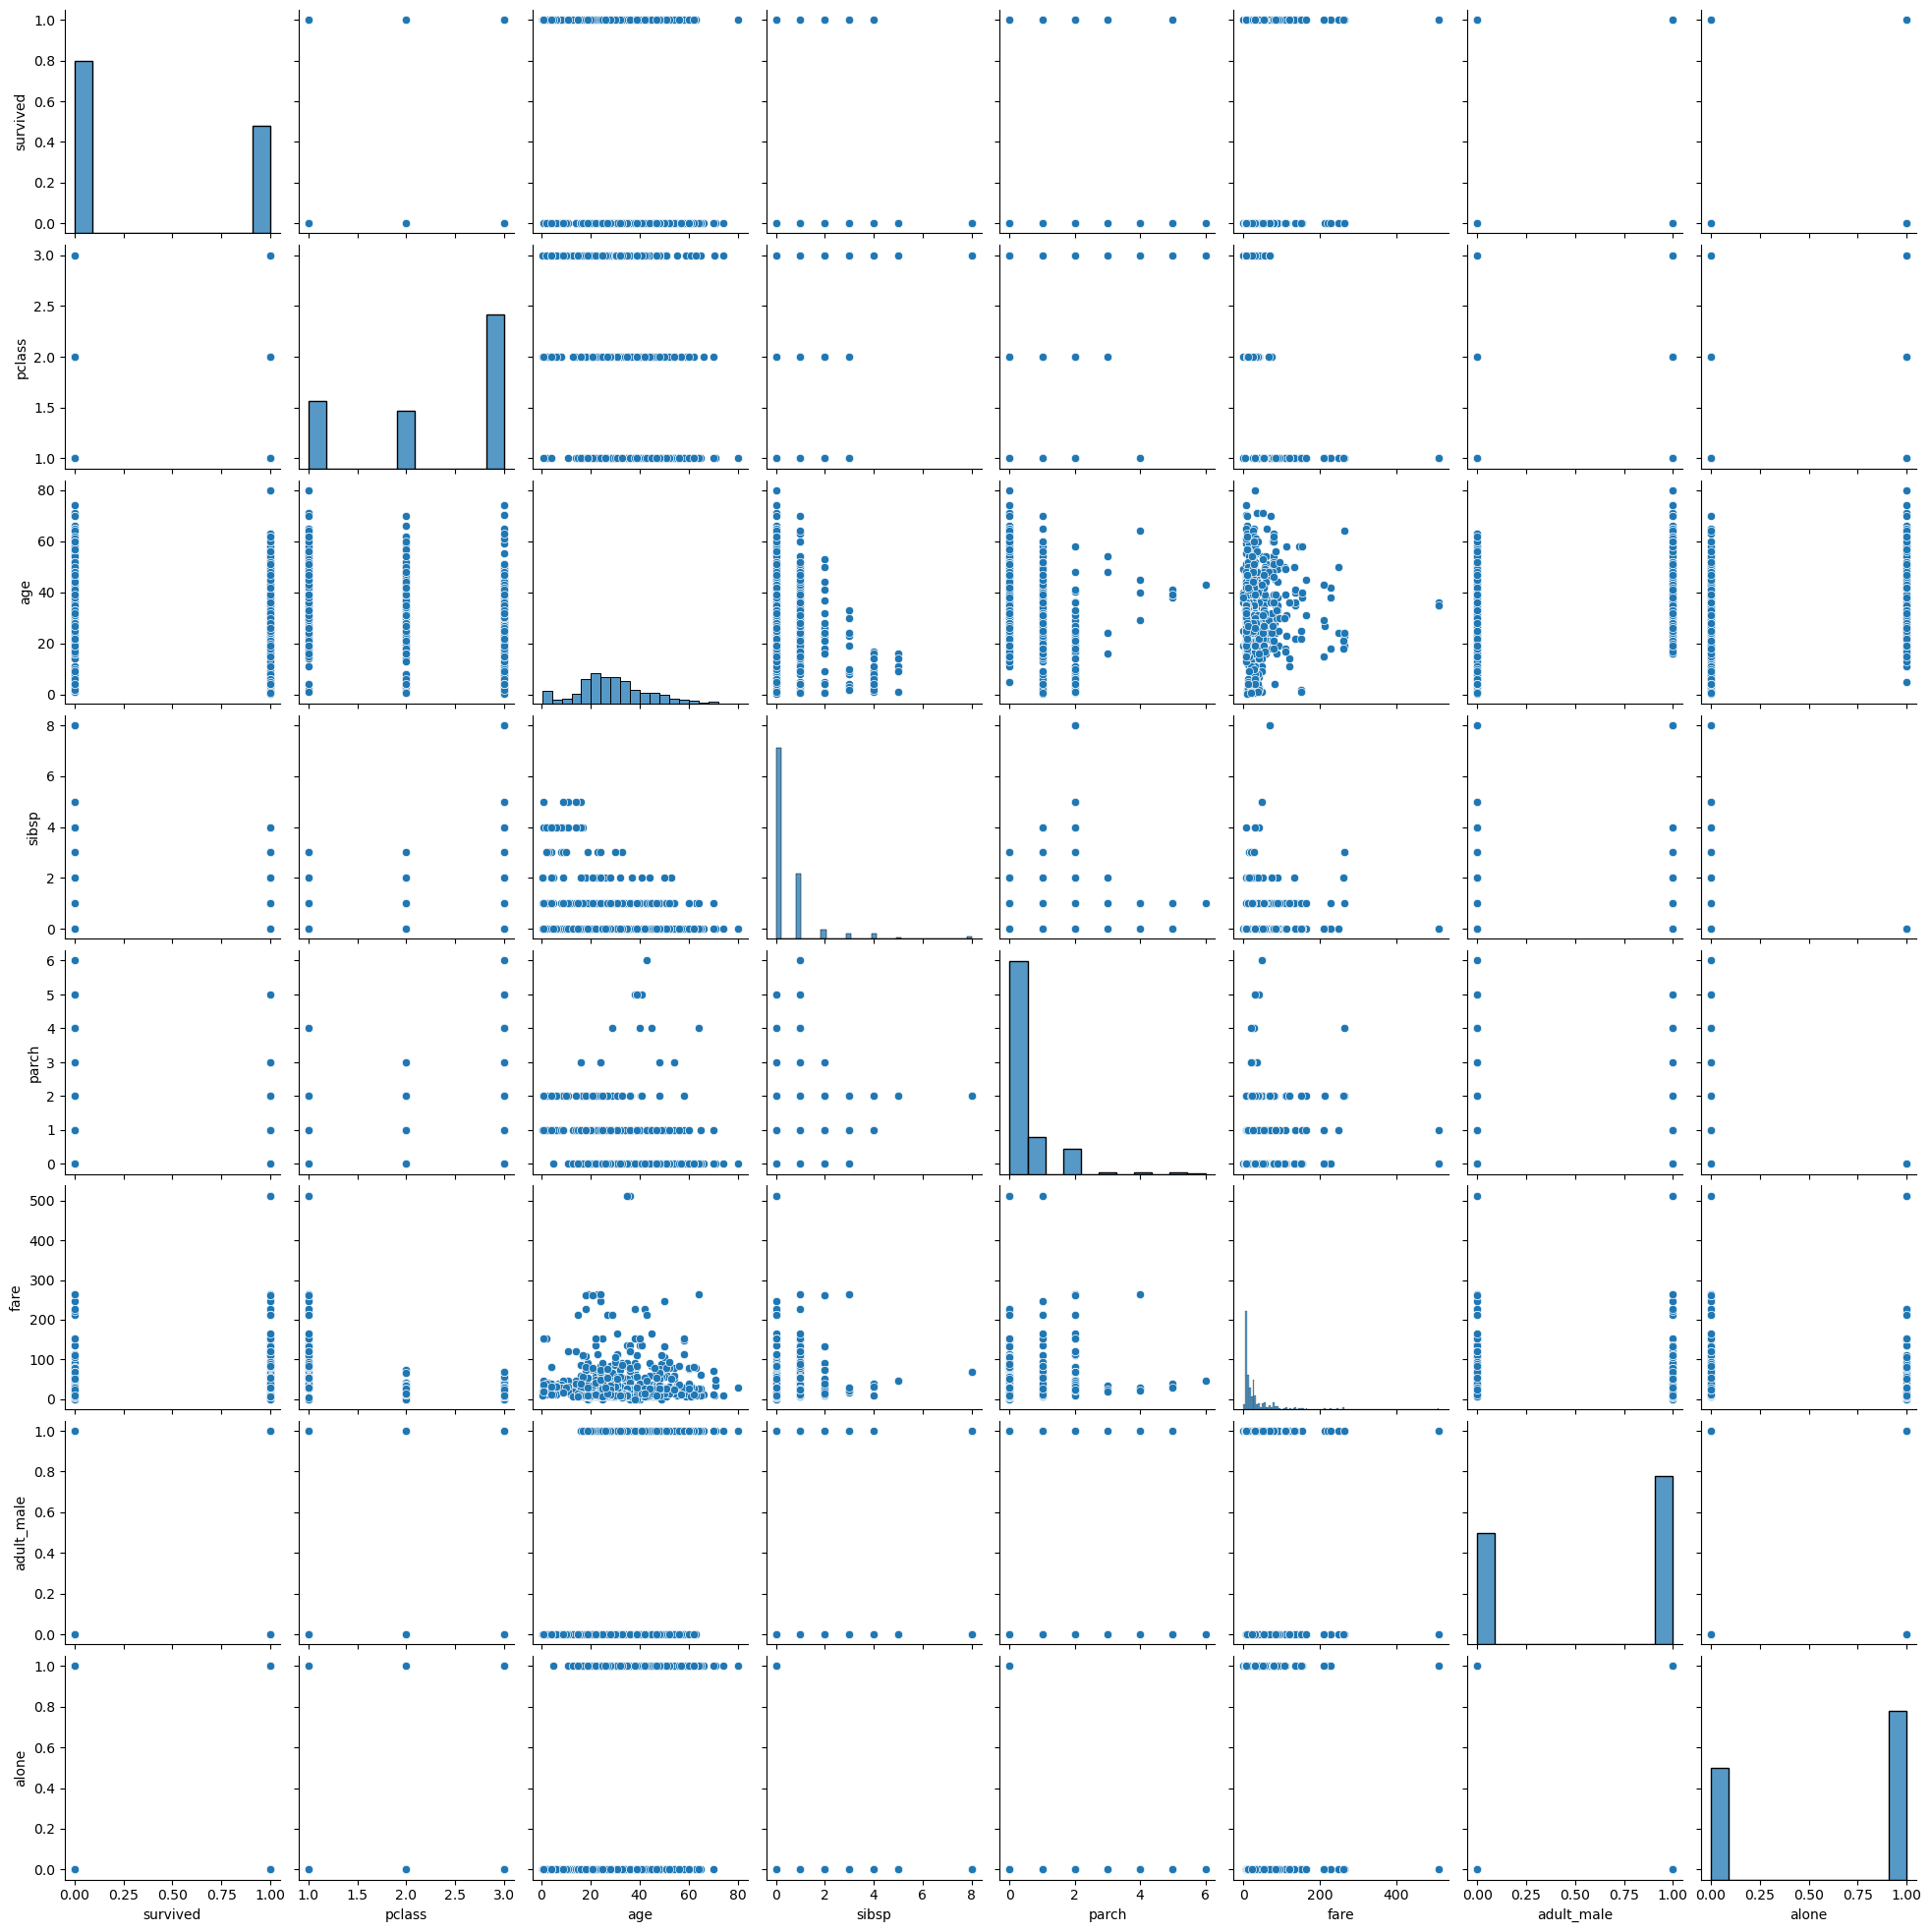



Visualize the count of survivors:


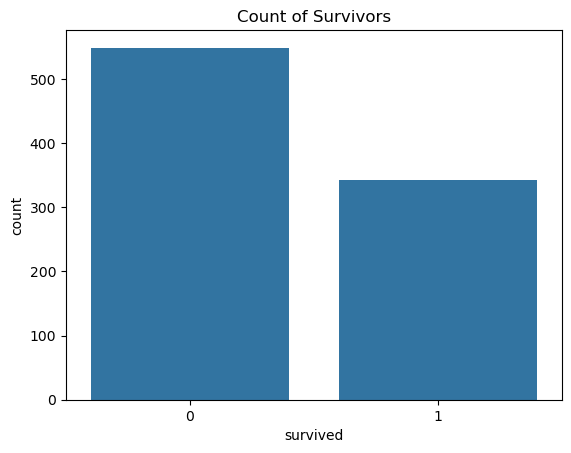



Visualize the survival rate based on passenger class:


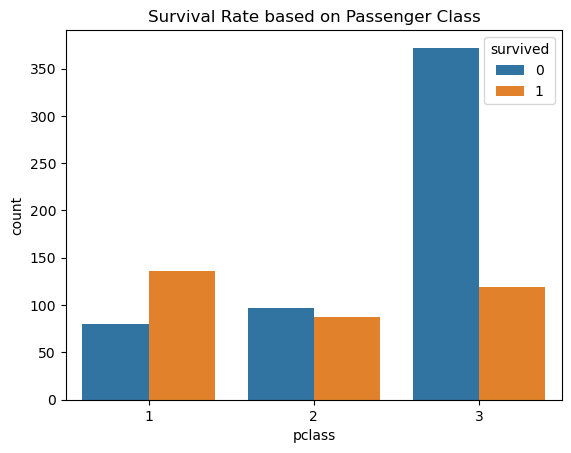



Visualize the survival rate based on gender:


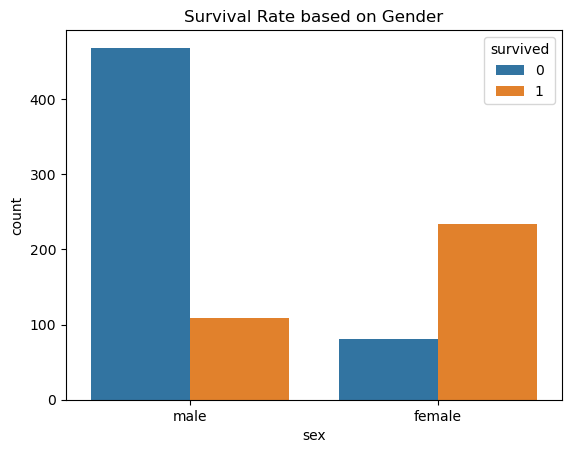

In [43]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(titanic_data.head())
print("\n" + "="*80 + "\n")

# Summary statistics of numerical columns
print("Summary statistics of numerical columns:")
print(titanic_data.describe())
print("\n" + "="*80 + "\n")

# Count of null values in each column
print("Count of null values in each column:")
print(titanic_data.isnull().sum())
print("\n" + "="*80 + "\n")

# Visualize the distribution of numerical features
print("Visualize the distribution of numerical features:")
sns.pairplot(titanic_data)
plt.show()
print("\n" + "="*80 + "\n")

# Visualize the count of survivors
print("Visualize the count of survivors:")
sns.countplot(x='survived', data=titanic_data)
plt.title('Count of Survivors')
plt.show()
print("\n" + "="*80 + "\n")


# Visualize the survival rate based on passenger class
print("Visualize the survival rate based on passenger class:")
sns.countplot(x='pclass', hue='survived', data=titanic_data)
plt.title('Survival Rate based on Passenger Class')
plt.show()
print("\n" + "="*80 + "\n")

# Visualize the survival rate based on gender
print("Visualize the survival rate based on gender:")
sns.countplot(x='sex', hue='survived', data=titanic_data)
plt.title('Survival Rate based on Gender')
plt.show()
print("\n" + "="*80 + "\n")


**Preprocessing Block**

In [44]:
# Separate features (X) and target variable (y)
X = titanic_data.drop('survived', axis=1)
y = titanic_data['survived']

# Print the available column names
print("Available column names:")
print(X.columns)

# Specify the features to omit
features_to_drop = ['class', 'adult_male', 'deck', 'alone', 'any_other_useless_feature']

# Drop the specified features from X if they exist
X = X.drop(features_to_drop, axis=1, errors='ignore')

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Display the count of null values after preprocessing
print("Count of null values after preprocessing:")
print(pd.DataFrame(X_processed).isnull().sum())
print("\n" + "="*80 + "\n")

# Display the preprocessed data
print("Preprocessed Data:")
print(pd.DataFrame(X_processed).head(10))


Available column names:
Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')
Count of null values after preprocessing:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64


Preprocessed Data:
    0          1    2    3        4    5    6    7    8    9    10   11   12  \
0  3.0  22.000000  1.0  0.0   7.2500  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
1  1.0  38.000000  1.0  0.0  71.2833  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2  3.0  26.000000  0.0  0.0   7.9250  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  1.0  35.000000  1.0  0.0  53.1000  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0   
4  3.0  35.000000  0.0  0.0   8.0500  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0   
5  3.0  29.699118  0.0  0.0   8.4583  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0   
6  1.0  54.000000  0.0  0.

In [31]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Display the shape of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (623, 18)
Shape of X_test: (268, 18)
Shape of y_train: (623,)
Shape of y_test: (268,)


In [32]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_


Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  1.0


### Cross-Validation Comparison

1. **Validation Set:**
   - *Description:* In validation set (or holdout validation), the dataset is split into two parts: a training set and a validation set. The model is trained on the training set and validated on the separate validation set.
   - *Advantages:*
     - Simple and computationally less expensive compared to cross-validation.
     - Suitable for small datasets where a larger portion of the data is needed for training.

2. **k-Fold Cross-Validation:**
   - *Description:* The dataset is divided into k subsets (folds). The model is trained k times, each time using k-1 folds for training and the remaining fold for validation. The average performance across all folds is used as the final performance metric.
   - *Advantages:*
     - Provides a more robust performance estimation compared to the validation set approach.
     - Reduces the variance in performance estimation.

3. **Leave-One-Out Cross-Validation (LOOCV):**
   - *Description:* LOOCV takes the concept of k-fold cross-validation to the extreme, where k is equal to the number of samples in the dataset. In each iteration, one sample is used for validation, and the model is trained on all other samples.
   - *Advantages:*
     - Provides the least biased estimate of model performance.
     - Useful when the dataset is small, and each sample is valuable for training.

### Choosing the Best Cross-Validation Technique for Our Model:

- **Considerations:**
  - **Dataset Size:** For small datasets, validation set or LOOCV may be more suitable due to the limited amount of data.
  - **Computational Resources:** k-Fold Cross-Validation might be computationally expensive, especially for large datasets.
  - **Bias-Variance Tradeoff:** k-Fold Cross-Validation provides a balance between bias and variance, offering a reliable performance estimate.

- **Decision:**
  - For our model, considering a moderately-sized dataset, k-Fold Cross-Validation is a good choice. It balances computational efficiency and provides a robust performance estimation.


**Leave-One-Out Cross-Validation train block**

In [33]:
# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
                                       min_samples_split=2, min_samples_leaf=1)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize variables to store results
predictions = []
true_labels = []

# Perform LOOCV
for train_index, test_index in loo.split(X_processed):
    X_train, X_test = X_processed[train_index], X_processed[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    dt_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = dt_classifier.predict(X_test)

    # Store predictions and true labels
    predictions.append(y_pred[0])
    true_labels.append(y_test.values[0])

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)

# Print the accuracy
print("Leave-One-Out Cross-Validation Accuracy:", accuracy)


Leave-One-Out Cross-Validation Accuracy: 1.0


**Leave-One-Out Cross-Validation Test block**

In [39]:
# Best parameters obtained from cross-validation
best_params = {'criterion': 'gini', 'splitter': 'best', 'max_depth': None,
               'min_samples_split': 2, 'min_samples_leaf': 1}

# Create a decision tree classifier with the best parameters
final_dt_classifier = DecisionTreeClassifier(**best_params)

# Train the final model on the entire training set
final_dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = final_dt_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Print the test accuracy
print("Test Set Accuracy:", accuracy_test)


Test Set Accuracy: 1.0


**k-Fold Cross-Validation**

In [35]:
# # Create a decision tree classifier
# dt_classifier = DecisionTreeClassifier()

# # Define the parameter grid to search
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create GridSearchCV with 10-fold cross-validation
# grid_search = GridSearchCV(dt_classifier, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Accuracy: ", grid_search.best_score_)

# # Get the best model
# best_dt_model = grid_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred_test = best_dt_model.predict(X_test)

# # Calculate test accuracy
# accuracy_test = accuracy_score(y_test, y_pred_test)

# # Print the test accuracy
# print("Test Set Accuracy:", accuracy_test)

Best Parameters:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best Accuracy:  1.0
Test Set Accuracy: 1.0
